In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.info
df.shape

(920, 16)

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

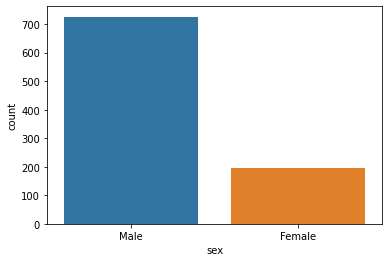

In [6]:
sns.countplot(df['sex'],label='Count')

In [7]:
df['sex'].unique()
df['sex']=df['sex'].apply(lambda x:0 if x=='Male' else 1)
df['sex'].unique()


array([0, 1], dtype=int64)

In [8]:
df['sex']=df['sex'].apply(lambda x:0 if x=='Male' else 1)
df['sex'].unique()

array([1], dtype=int64)

In [9]:
df['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['trestbps'] = df.trestbps.fillna(df.trestbps.mean())
df['chol'] = df.chol.fillna(df.chol.mean())
df['fbs'] = df.fbs.fillna(df.fbs.mean())
#df['restecg'] = df.restecg.fillna(df.restecg.mean())
df['thalch'] = df.thalch.fillna(df.thalch.mean())
df['exang'] = df.exang.fillna(df.exang.mean())
df['oldpeak'] = df.oldpeak.fillna(df.oldpeak.mean())
#df['slope'] = df.slope.fillna(df.slope.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
#df['thal'] = df.thal.fillna(df.thal.mean())

In [10]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang         0
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<AxesSubplot:xlabel='chol', ylabel='Density'>

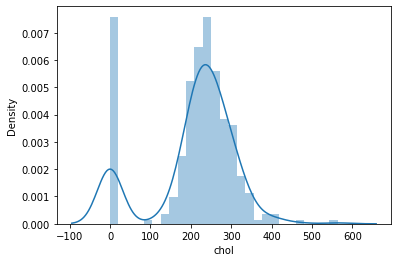

In [13]:
sns.distplot(df['chol'])

In [14]:
#df.info
#cover object to int64 {exang,slope,thal,restecg,fbs,dataset}
df['exang'].unique()
df['exang']=pd.get_dummies(df['exang'],drop_first=True)
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [15]:
df['slope']=df['slope'].apply(lambda x:0 if x== 'downsloping' else 1 if x=='flat'else 2)
df['slope'].unique()
#df.info

array([0, 1, 2], dtype=int64)

In [16]:
df['thal']=df['thal'].apply(lambda x:0 if x== 'fixed defect' else 1 if x=='normal'else 2)
df['thal'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
df['exang']=df['exang'].apply(lambda x:0 if x== 'TRUE' else 1)
df['exang'].unique()

array([1], dtype=int64)

In [18]:
df['fbs']=pd.get_dummies(df['fbs'],drop_first=True)
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [19]:
df['restecg']=df['restecg'].apply(lambda x:0 if x== 'lv hypertrophy' else 1 if x=='normal'else 2)
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [20]:
df['dataset'].unique()
df['dataset']=df['dataset'].apply(lambda x:0 if x== 'Cleveland' else 1 if x=='Hungary'else 2)
df['dataset'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
df['cp'].unique()
df['cp']=df['cp'].apply(lambda x:0 if x== 'typical angina' else 1 if x=='asymptomatic'else 2 if x=='non-anginal'else 3)
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

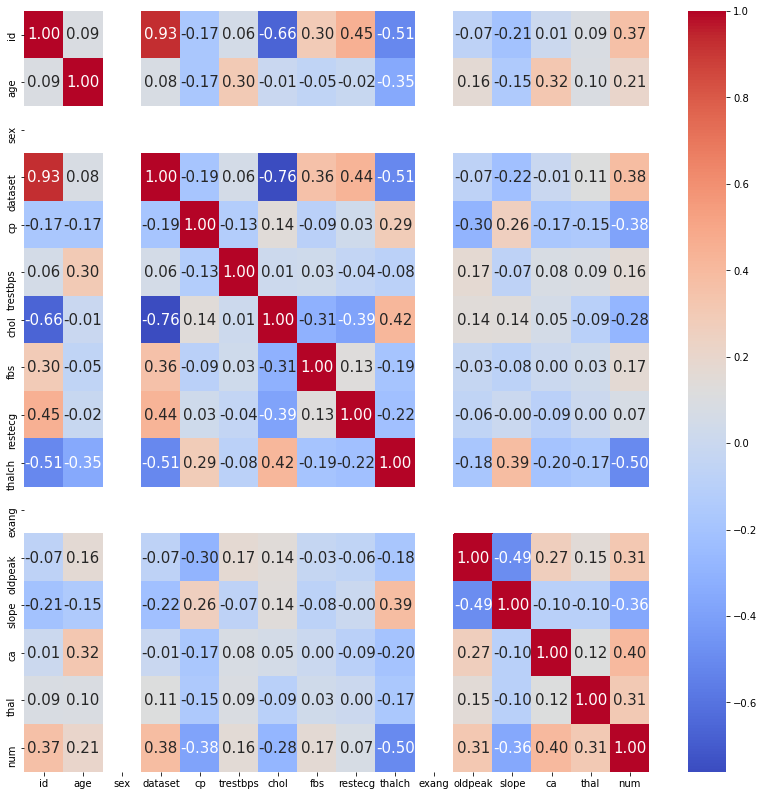

                id       age  sex   dataset        cp  trestbps      chol  \
id        1.000000  0.092275  NaN  0.929062 -0.170267  0.055970 -0.663297   
age       0.092275  1.000000  NaN  0.080943 -0.172853  0.301845 -0.009205   
sex            NaN       NaN  NaN       NaN       NaN       NaN       NaN   
dataset   0.929062  0.080943  NaN  1.000000 -0.187369  0.057759 -0.760500   
cp       -0.170267 -0.172853  NaN -0.187369  1.000000 -0.125989  0.143002   
trestbps  0.055970  0.301845  NaN  0.057759 -0.125989  1.000000  0.014993   
chol     -0.663297 -0.009205  NaN -0.760500  0.143002  0.014993  1.000000   
fbs       0.297040 -0.052739  NaN  0.359540 -0.089824  0.028711 -0.312186   
restecg   0.451081 -0.015132  NaN  0.435781  0.028004 -0.043361 -0.386909   
thalch   -0.507115 -0.354478  NaN -0.511121  0.290741 -0.080784  0.416848   
exang          NaN       NaN  NaN       NaN       NaN       NaN       NaN   
oldpeak  -0.072579  0.161915  NaN -0.069857 -0.297823  0.167918  0.144096   

In [22]:
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.show()
print(corr)

id


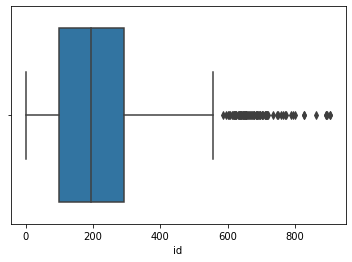

age


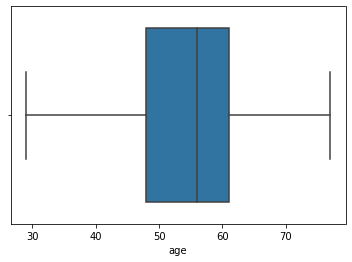

sex


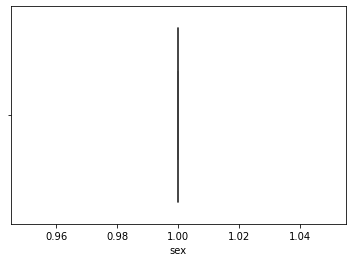

dataset


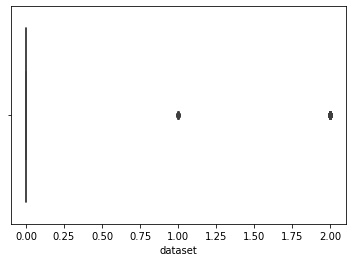

cp


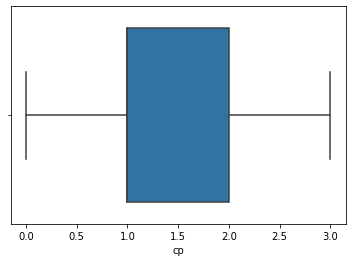

trestbps


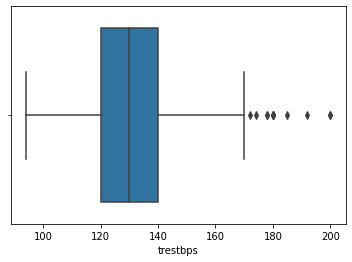

chol


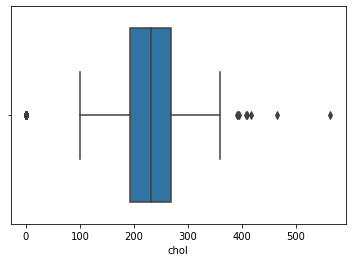

fbs


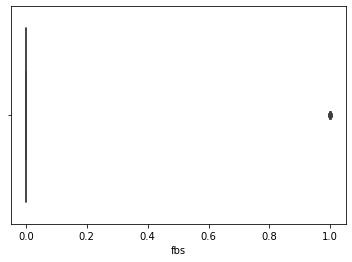

restecg


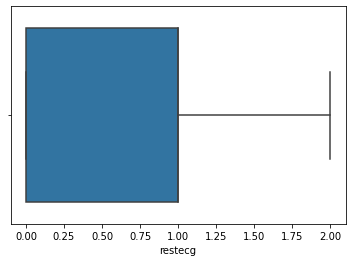

thalch


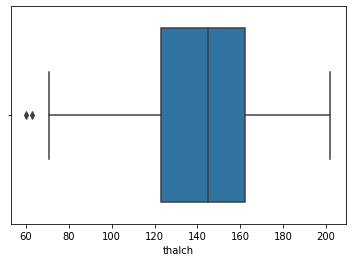

exang


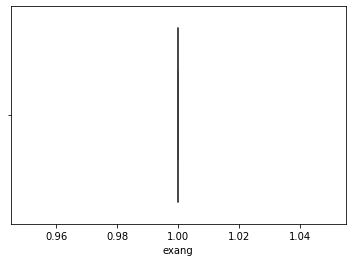

oldpeak


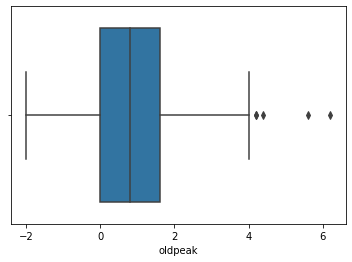

slope


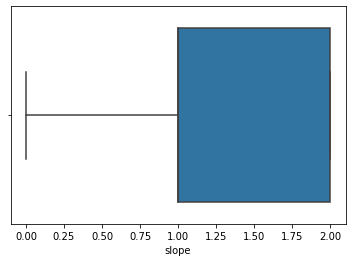

ca


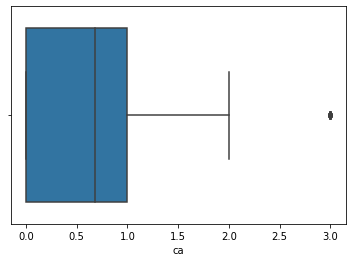

thal


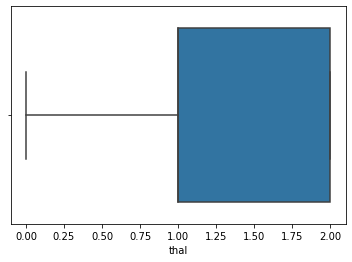

In [23]:
for i in df.iloc[0:,:-1].columns:
    sns.boxplot(df[i],data=df)
    print(i)
    plt.show()

In [24]:
def outlier(df):
    for x in df.iloc[:,:-1].columns :        
        Q1=df[x].quantile(0.25)
        Q3=df[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        df.loc[:,x]= np.where(df[x].values > Upper, Upper-1, df[x].values)
        df.loc[:,x]= np.where(df[x].values < Lower, Lower+1, df[x].values)

outlier(df)

id


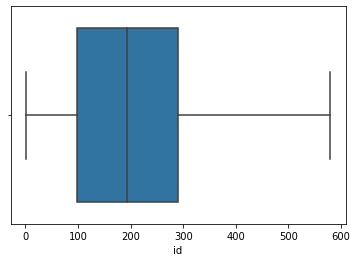

age


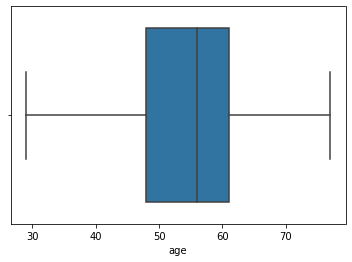

sex


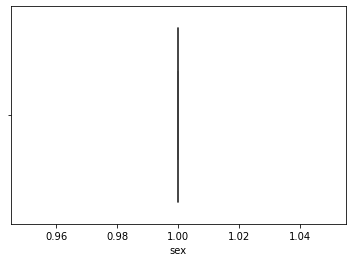

dataset


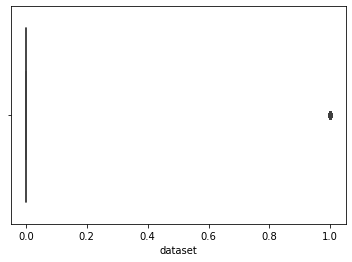

cp


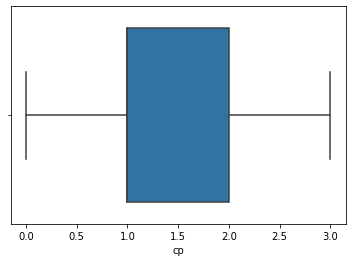

trestbps


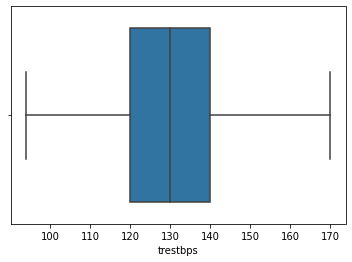

chol


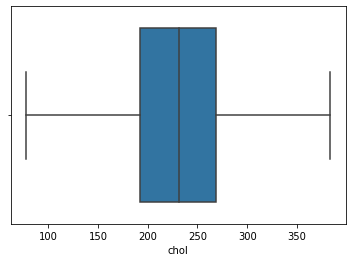

fbs


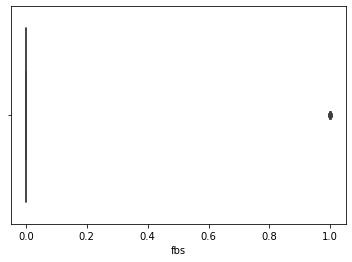

restecg


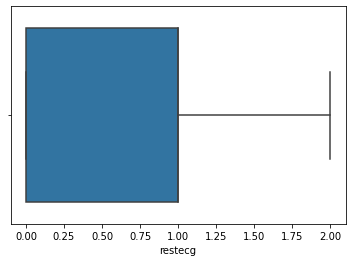

thalch


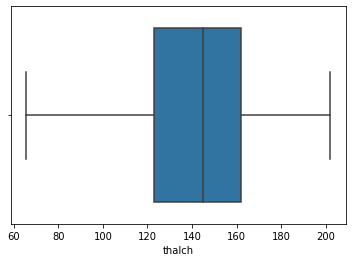

exang


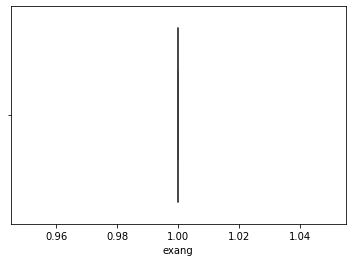

oldpeak


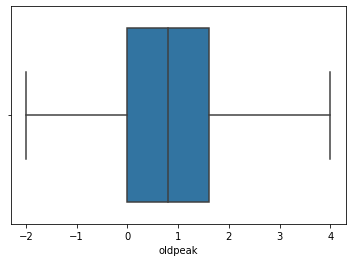

slope


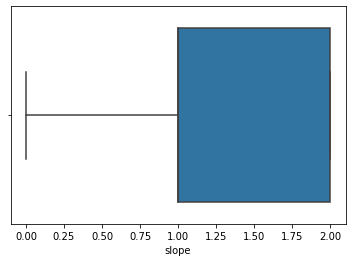

ca


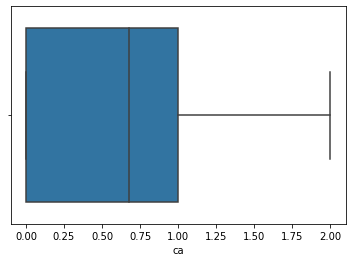

thal


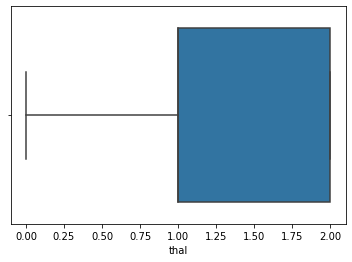

In [25]:
for i in df.iloc[:,:-1].columns:
    sns.boxplot(df[i],data=df)
    print(i)
    plt.show()

In [26]:
y=df['num']
X=df.copy()
X.drop('num',axis=1,inplace=True)
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=4)
display(X_train.head(),y_train.head(),X_test.head(),y_test.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
385,386.0,46.0,1.0,1.0,1.0,110.0,238.0,0.0,2.0,140.0,1.0,1.0,1.0,0.676375,1.0
826,579.5,50.0,1.0,1.0,1.0,144.0,349.0,0.0,0.0,120.0,1.0,1.0,2.0,0.676375,2.0
100,101.0,45.0,1.0,0.0,1.0,115.0,260.0,0.0,0.0,185.0,1.0,0.0,2.0,0.000000,1.0
129,130.0,62.0,1.0,0.0,1.0,124.0,209.0,0.0,1.0,163.0,1.0,0.0,2.0,0.000000,1.0
181,182.0,56.0,1.0,0.0,1.0,134.0,383.5,0.0,0.0,150.0,1.0,1.9,1.0,2.000000,2.0


385    0
826    1
100    0
129    0
181    1
Name: num, dtype: int64

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
621,579.5,48.0,1.0,1.0,1.0,115.0,77.5,1.0,1.0,128.0,1.0,0.0,1.0,0.676375,0.0
134,135.0,43.0,1.0,0.0,2.0,122.0,213.0,0.0,1.0,165.0,1.0,0.2,1.0,0.000000,1.0
258,259.0,70.0,1.0,0.0,3.0,156.0,245.0,0.0,0.0,143.0,1.0,0.0,2.0,0.000000,1.0
101,102.0,34.0,1.0,0.0,0.0,118.0,182.0,0.0,0.0,174.0,1.0,0.0,2.0,0.000000,1.0
207,208.0,50.0,1.0,0.0,1.0,144.0,200.0,0.0,0.0,126.0,1.0,0.9,1.0,0.000000,2.0


621    1
134    0
258    0
101    0
207    1
Name: num, dtype: int64

# SCALING

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
# For Binary
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict_test = DT.predict(X_test)
print(DT.fit(X_train,y_train).tree_.node_count)

83


In [31]:
#print("Binary Output DecisionTreeClassifier",metrics.accuracy_score(predict_test,y_test),'\n')
#print(metrics.classification_report(y_test, predict_test))
#clf.score(X_train, y_train)
acc=accuracy_score(y_test,predict_test)*100
print(acc)

82.75862068965517


# Logistic

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predict_test = clf.predict(X_test)

In [33]:
acc=accuracy_score(y_test,predict_test)*100
print(acc)

88.79310344827587
